In [416]:
import numpy as np
import matplotlib.pyplot as plt



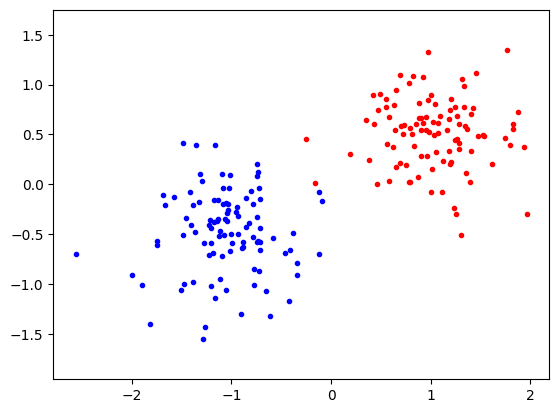

In [514]:

# generation of data that can be used for binary classification (two classes) in 2D.
n=100
mA = np.array([1.0,0.5])
sigmaA = 0.4
mB = np.array([-1.0,-0.5])
sigmaB = 0.4
classA = np.zeros((n,2))
classB = np.zeros((n,2))
classA[:,0] = np.random.normal(mA[0],sigmaA,n)
classA[:,1] = np.random.normal(mA[1],sigmaA,n)
classB[:,0] = np.random.normal(mB[0],sigmaB,n)
classB[:,1] = np.random.normal(mB[1],sigmaB,n)

# plot the data
plt.plot(classA[:,0],classA[:,1],'r.')
plt.plot(classB[:,0],classB[:,1],'b.')
plt.axis('equal') # make axis equal
plt.show()



In [418]:
#measure the performance of the perceptron algorithm
def accuracy(classA,classB,w,b):
    # initialization of the number of correctly classified points
    correct = 0
    # loop over all points in classA
    for x in classA:
        # check if the point is correctly classified
        if np.dot(w,x)+b > 0:
            correct += 1
    # loop over all points in classB
    for x in classB:
        # check if the point is correctly classified
        if np.dot(w,x)+b < 0:
            correct += 1
    # return the accuracy
    return correct/(len(classA)+len(classB))

In [419]:

#implementation of the perceptron algorithm
#input: classA, classB, n (number of iterations)
#output: w (weight vector), b (bias)
def perceptron(classA,classB,epochs,learning_rate=0.1,plot=False):
    # initialization of the weight vector and bias
    w = np.zeros(2)
    b = 0
    na = len(classA)
    nb = len(classB)
    convergence = np.zeros(epochs)
    # loop for n iterations
    for i in range(epochs):
        # create a list of ramdom ordered indices
        indices = np.random.permutation(na+nb)
        for j in indices:
            # select a random point
            if j < na:
                x = classA[j,:]
                target = 1
            else:
                x = classB[j-na,:]
                target = -1
            # check if the point is correctly classified
            if target*(np.dot(w,x)+b) <= 0:
                # update the weight vector and bias
                w = w + learning_rate*target*x
                b = b + learning_rate*target
                # plot the current state
        if plot:
                    plt.plot(classA[:,0],classA[:,1],'r.')
                    plt.plot(classB[:,0],classB[:,1],'b.')
                    plt.axis('equal')
                    plt.plot([-2,2],[-(b+w[0]*(-2))/w[1],-(b+w[0]*(2))/w[1]])
                    plt.xlim(-2,2)
                    plt.ylim(-1,3)
                    plt.show()
        # measure the accuracy
        convergence[i] = accuracy(classA,classB,w,b)
        
    return w,b,convergence




In [464]:
#implementation of the delta rule
#input: classA, classB, epoch (number of iterations)
#output: w (weight vector), b (bias)
def delta_rule_batch(classA,classB,epochs,learning_rate=0.1,plot=False):
    # initialization input and target
    n = len(classA)
    x = np.zeros((2*n,2))
    x[:n,:] = classA
    x[n:,:] = classB
    target = np.zeros(2*n)
    target[:n] = 1
    target[n:] = -1
    x = np.concatenate((x,np.ones((2*n,1))),axis=1)
    x.transpose()
    # initialization of the weight vector drawn from the normal distribution with zero mean and unit variance
    W = np.random.normal(0,1,x.shape)
    convergence = np.zeros(epochs)
    for i in range(epochs):
        W = W - learning_rate*np.dot((np.dot(W,x.transpose())-target),x)
        # plot the current state
        
        if plot:
            w1,w2,b = W.sum(axis=0)
            b=0
            plt.plot(classA[:,0],classA[:,1],'r.') 
            plt.plot(classB[:,0],classB[:,1],'b.')
            plt.axis('equal')
            plt.plot([-2,2],[-(b+w1*(-2))/w2,-(b+w1*(2))/w2])
            plt.xlim(-2,2)
            plt.ylim(-1,3)
            plt.show()
        # measure the accuracy
        w1,w2,b = W.sum(axis=0)
        b=0
        convergence[i] = accuracy(classA,classB,[w1,w2],b)
    return [w1,w2],b,convergence




In [421]:
#implementation of the delta rule (sequential)
def delta_rule_sequential(classA,classB,epochs,learning_rate=0.1,plot=False):
    # initialization of the weight vector and bias
    na = len(classA)
    nb = len(classB)
    x = np.zeros((na+nb,2))
    x[:na,:] = classA
    x[nb:,:] = classB
    target = np.zeros(na+nb)
    target[:na] = 1
    target[nb:] = -1
    x = np.concatenate((x,np.ones((na+nb,1))),axis=1)
    # initialization of the weight vector drawn from the normal distribution with zero mean and unit variance
    W = np.random.normal(0,1,3)
    convergence = np.zeros(epochs)
    # loop for n iterations
    
    for i in range(epochs):
        # create a list of ramdom ordered indices
        indices = np.random.permutation(na+nb)
        for j in indices:
            # select a random point
            xj = x[j,:]
            targetj = target[j]
            # update the weight vector and bias
            W = W - learning_rate*(np.dot(W,xj)-targetj)*xj

        convergence[i] = accuracy(classA,classB,[W[0],W[1]],W[2])
        if plot:
                    plt.plot(classA[:,0],classA[:,1],'r.')
                    plt.plot(classB[:,0],classB[:,1],'b.')
                    plt.axis('equal')
                    plt.plot([-2,2],[-(W[2]+W[0]*(-2))/W[1],-(W[2]+W[0]*(2))/W[1]])
                    plt.xlim(-2,2)
                    plt.ylim(-1,3)
                    plt.show()
        
    return [W[0],W[1]],W[2],convergence

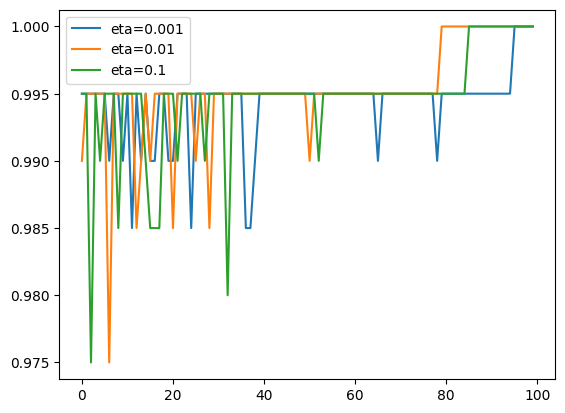

In [515]:
etas=[0.001,0.01,0.1]
for eta in etas:
    w,b,convergence = perceptron(classA,classB,100,eta)
    plt.plot(convergence,label='eta='+str(eta))
plt.legend()
plt.show()


[0.05071795 0.0176222 ] -0.01


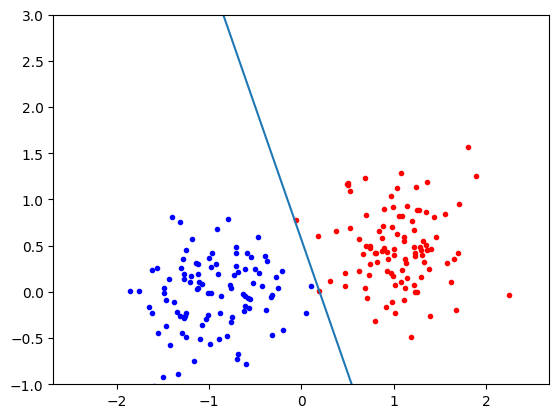

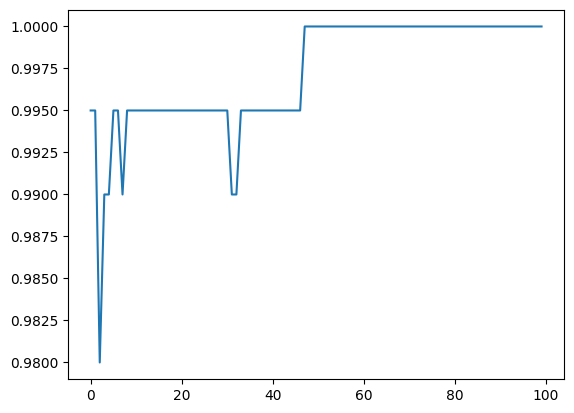

In [438]:

w,b,convergence = perceptron(classA,classB,100,0.01)
print(w,b)
#plot the decision boundary
plt.plot(classA[:,0],classA[:,1],'r.')
plt.plot(classB[:,0],classB[:,1],'b.')
plt.axis('equal')
plt.plot([-2,2],[-(b+w[0]*(-2))/w[1],-(b+w[0]*(2))/w[1]])
plt.xlim(-2,2)
plt.ylim(-1,3)
plt.show()

#plot the convergence
plt.plot(convergence)
plt.show()


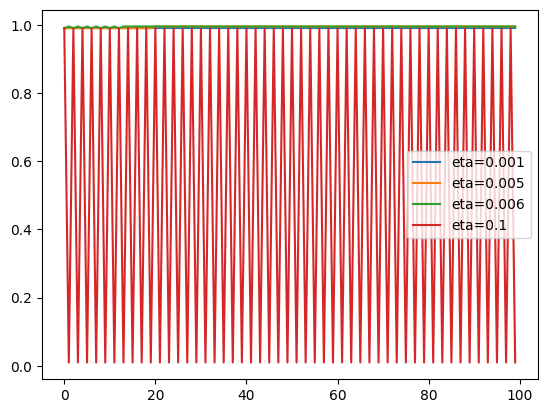

In [518]:
etas=[0.001,0.005,0.006, 0.1]
for eta in etas:
    w,b,convergence = delta_rule_batch(classA,classB,100,eta)
    plt.plot(convergence,label='eta='+str(eta))
plt.legend()
plt.show()


[141.56591077908774, 73.99691042990231] 0


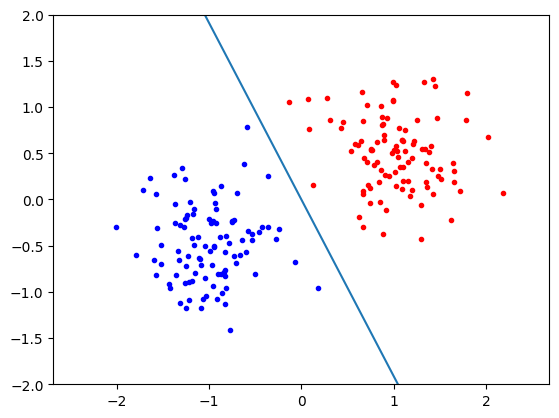

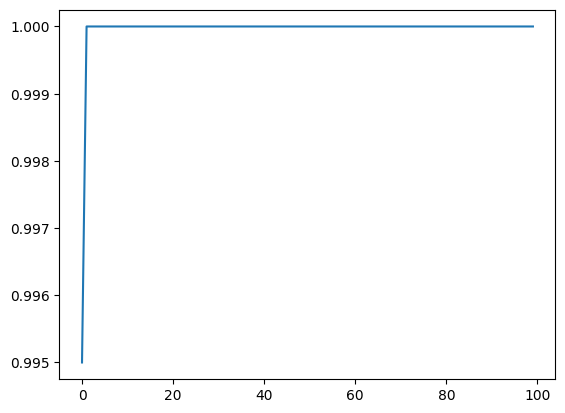

In [469]:

w,b,convergence = delta_rule_batch(classA,classB,100,0.001)
print(w,b)
plt.plot(classA[:,0],classA[:,1],'r.') 
plt.plot(classB[:,0],classB[:,1],'b.')
plt.axis('equal')
plt.plot([-2,2],[-(b+w[0]*(-2))/w[1],-(b+w[0]*(2))/w[1]])
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.show()

#plot the convergence
plt.plot(convergence)
plt.show()




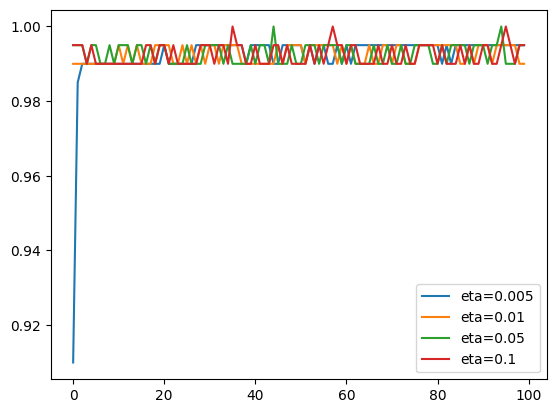

In [524]:
etas=[0.005, 0.01, 0.05, 0.1]
for eta in etas:
    w,b,convergence = delta_rule_sequential(classA,classB,100,eta)
    plt.plot(convergence,label='eta='+str(eta))

plt.legend()
plt.show()


[0.8127540622140633, 0.2179186126872797] -0.08838470644859925


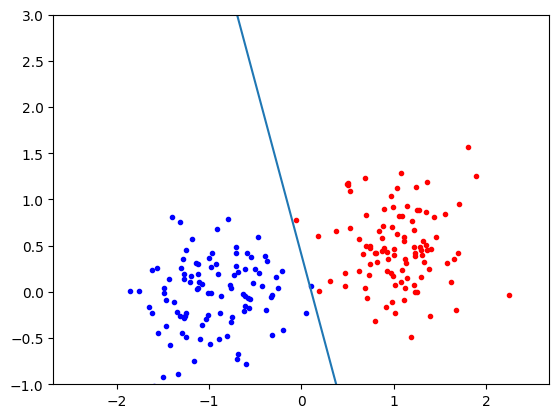

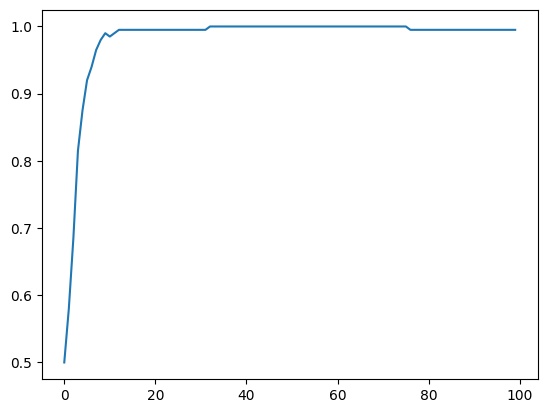

In [459]:

w,b,convergence = delta_rule_sequential(classA,classB,100,0.001)
print(w,b)
plt.plot(classA[:,0],classA[:,1],'r.') 
plt.plot(classB[:,0],classB[:,1],'b.')
plt.axis('equal')
plt.plot([-2,2],[-(b+w[0]*(-2))/w[1],-(b+w[0]*(2))/w[1]])
plt.xlim(-2,2)
plt.ylim(-1,3)
plt.show()

#plot the convergence
plt.plot(convergence)
plt.show()


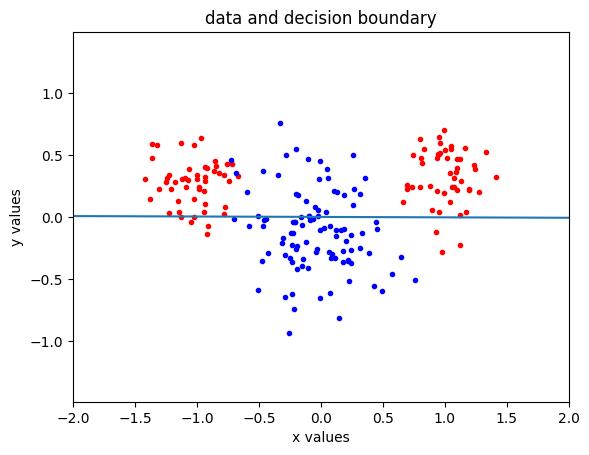

global 0.8
0.92
0.68


In [487]:
#classification of a new point none linearly separable
n_2=100
mA_2 = np.array([1,0.3])
sigmaA_2 = 0.2
mB_2 = np.array([0,-0.1])
sigmaB_2 = 0.3
classA2 = np.zeros((n_2//2,2))
classA_bis = np.zeros((n_2//2,2))
classB2 = np.zeros((n_2,2))
classA2[:,0] = np.random.normal(mA_2[0],sigmaA_2,n_2//2)
classA2[:,1] = np.random.normal(mA_2[1],sigmaA_2,n_2//2)
classA_bis[:,0] = np.random.normal(-mA_2[0],sigmaA_2,n_2//2)
classA_bis[:,1] = np.random.normal(mA_2[1],sigmaA_2,n_2//2)
classB2[:,0] = np.random.normal(mB_2[0],sigmaB_2,n_2)
classB2[:,1] = np.random.normal(mB_2[1],sigmaB_2,n_2)
classA2 = np.concatenate((classA2,classA_bis),axis=0)
#suffle the data
np.random.shuffle(classA2)

w,b,_=perceptron(classA2,classB2,1000,1)
# plot the data
plt.plot(classA2[:,0],classA2[:,1],'r.')
plt.plot(classB2[:,0],classB2[:,1],'b.')
plt.axis('equal') # make axis equal
plt.plot([-2,2],[-(b+w[0]*(-2))/w[1],-(b+w[0]*(2))/w[1]])
plt.xlim(-2,2)
plt.ylim(-1,1)
#name x-axis
plt.xlabel('x values')
#name y-axis
plt.ylabel('y values')
plt.title('data and decision boundary')
plt.show()
print('global '+ str(accuracy(classA2,classB2,w,b)))
print(accuracy(classA2,[],w,b))
print(accuracy([],classB2,w,b))



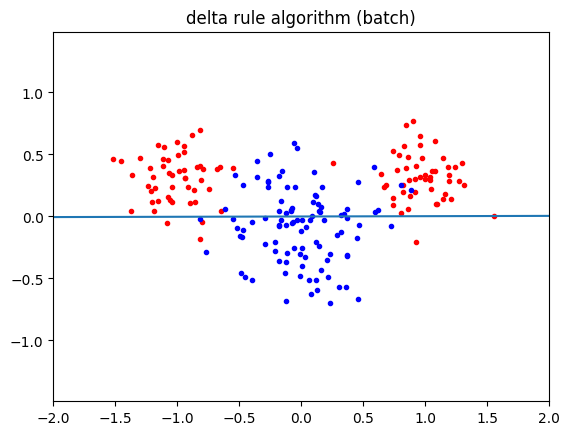

global 0.78
0.96
0.6


In [471]:
w,b,_=delta_rule_batch(classA2,classB2,1000,0.001)
# plot the data
plt.plot(classA2[:,0],classA2[:,1],'r.')
plt.plot(classB2[:,0],classB2[:,1],'b.')
plt.axis('equal') # make axis equal
plt.plot([-2,2],[-(b+w[0]*(-2))/w[1],-(b+w[0]*(2))/w[1]])
plt.xlim(-2,2)
plt.ylim(-1,1)
plt.title('delta rule algorithm (batch)')
plt.show()
print('global '+ str(accuracy(classA2,classB2,w,b)))
print(accuracy(classA2,[],w,b))
print(accuracy([],classB2,w,b))

In [489]:
#remove random 25% from each class
classA_1 = classA2[:75,:]
classB_1 = classB2[:75,:]

#remove random 50% from class A
classA_2 = classA2[:50,:]

#remove random 50% from class B
classB_3 = classB2[:50,:]

# 20% of 50 samples (10 samples) from a subset of classA for which classA(1,:)<0 and 80%, 40 samples from a subset of classA for which classA(1,:)>0
classA_4 = classA2[classA2[:,0]<0,:][:10,:]
classA_5 = classA2[classA2[:,0]>0,:][:40,:]
classA_6 = np.concatenate((classA_4,classA_5),axis=0)

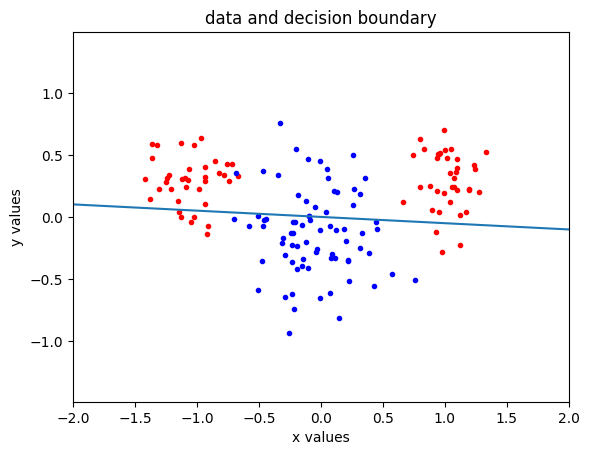

global 0.8
0.88
0.72


In [490]:
w,b,_=perceptron(classA_1,classB_1,1000,1)
#plot the result
plt.plot(classA_1[:,0],classA_1[:,1],'r.')
plt.plot(classB_1[:,0],classB_1[:,1],'b.')
plt.axis('equal') # make axis equal
plt.plot([-2,2],[-(b+w[0]*(-2))/w[1],-(b+w[0]*(2))/w[1]])
plt.xlim(-2,2)
plt.ylim(-1,1)
#name x-axis
plt.xlabel('x values')
#name y-axis
plt.ylabel('y values')
plt.title('data and decision boundary')
plt.show()
print('global '+ str(accuracy(classA_1,classB_1,w,b)))
print(accuracy(classA_1,[],w,b))
print(accuracy([],classB_1,w,b))

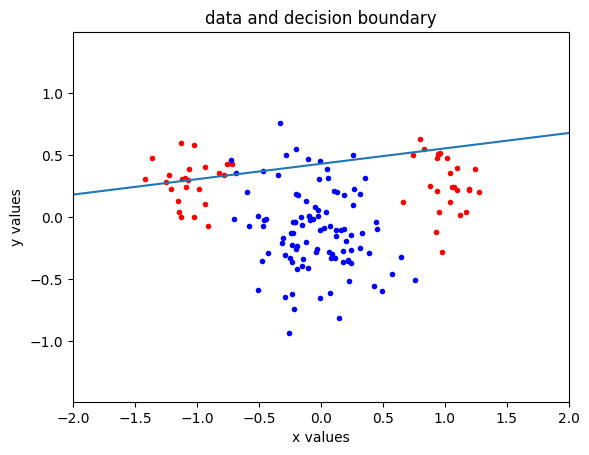

global 0.72
0.34
0.91


In [495]:
w,b,_=perceptron(classA_2,classB2,1000,1)

plt.plot(classA_2[:,0],classA_2[:,1],'r.')
plt.plot(classB2[:,0],classB2[:,1],'b.')
plt.axis('equal') # make axis equal
plt.plot([-2,2],[-(b+w[0]*(-2))/w[1],-(b+w[0]*(2))/w[1]])
plt.xlim(-2,2)
plt.ylim(-1,1)
#name x-axis
plt.xlabel('x values')
#name y-axis
plt.ylabel('y values')
plt.title('data and decision boundary')
plt.show()
print('global '+str(accuracy(classA_2,classB2,w,b)))
print(accuracy(classA_2,[],w,b))
print(accuracy([],classB2,w,b))

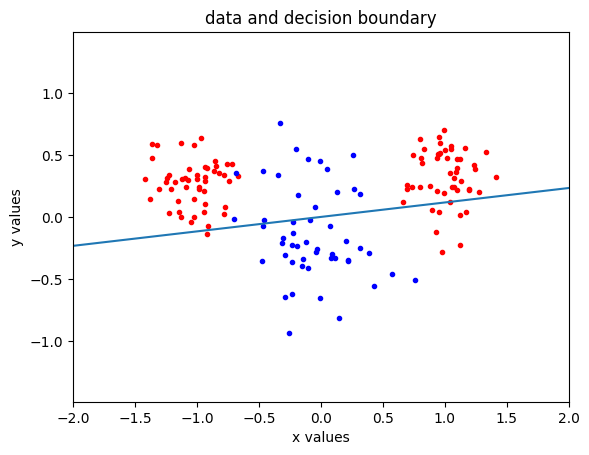

global 0.8333333333333334
0.91
0.68


In [502]:
w,b,_ = perceptron(classA2,classB_3,1000,1)

plt.plot(classA2[:,0],classA2[:,1],'r.')
plt.plot(classB_3[:,0],classB_3[:,1],'b.')
plt.axis('equal') # make axis equal
plt.plot([-2,2],[-(b+w[0]*(-2))/w[1],-(b+w[0]*(2))/w[1]])
plt.xlim(-2,2)
plt.ylim(-1,1)
#name x-axis
plt.xlabel('x values')
#name y-axis
plt.ylabel('y values')
plt.title('data and decision boundary')
plt.show()
print("global "+str(accuracy(classA2,classB_3,w,b)))
print(accuracy(classA2,[],w,b))
print(accuracy([],classB_3,w,b))

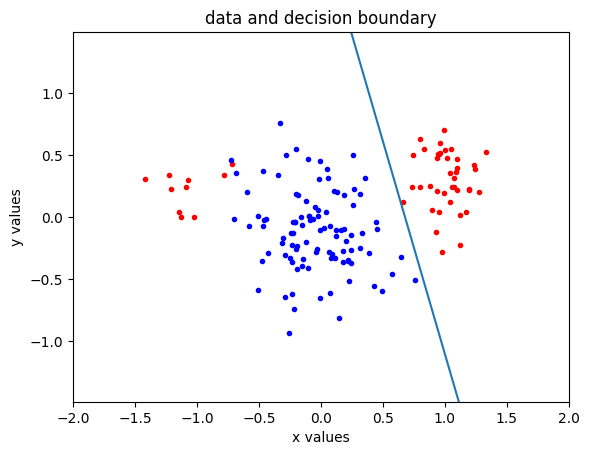

global 0.9333333333333333
0.8
1.0


In [509]:
w,b,_=perceptron(classA_6,classB2,1000,1)

plt.plot(classA_6[:,0],classA_6[:,1],'r.')
plt.plot(classB2[:,0],classB2[:,1],'b.')
plt.axis('equal') # make axis equal
plt.plot([-2,2],[-(b+w[0]*(-2))/w[1],-(b+w[0]*(2))/w[1]])
plt.xlim(-2,2)
plt.ylim(-1,1)
#name x-axis
plt.xlabel('x values')
#name y-axis
plt.ylabel('y values')
plt.title('data and decision boundary')
plt.show()
print("global "+ str(accuracy(classA_6,classB2,w,b)))
print(accuracy(classA_6,[],w,b))
print(accuracy([],classB2,w,b))


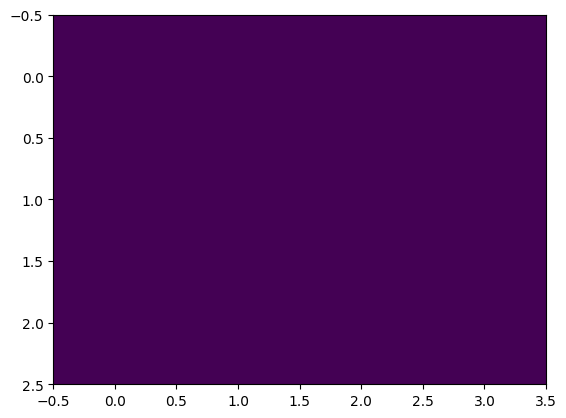